In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import regex as re

import warnings
warnings.filterwarnings('ignore')


C:\Users\Makis\AppData\Local\Temp\ipykernel_16392\2020224613.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Data Preprocessing

In [2]:
df = pd.read_csv('./v5_withCluster.csv', encoding='unicode_escape')
df.head()

,Customer ID,Name,Location,Gender,Age,Access Frequency,Preferred Map Type,Person with Disability,Rating,Review,Clusters
0,1,Alice,Toronto,M,25,daily,default-2d,no,5,Easy to use and very informative,2
1,2,Bob,Toronto,M,32,daily,default-2d,yes,2,Issues with handicap parking space availability,3
2,3,Charlie,Montreal,F,61,monthly,default-2d,no,2,Map symbols complex,1
3,4,David,Winnipeg,F,42,weekly,default-2d,yes,5,I like it's simplicity in finding parking,2
4,5,Emma,Vancouver,M,61,weekly,default-2d,no,2,It is easy to use,3


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2936 entries, 0 to 2935
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Customer ID             2936 non-null   int64 
 1   Name                    2936 non-null   object
 2   Location                2936 non-null   object
 3   Gender                  2936 non-null   object
 4   Age                     2936 non-null   int64 
 5   Access Frequency        2936 non-null   object
 6   Preferred Map Type      2936 non-null   object
 7   Person with Disability  2936 non-null   object
 8   Rating                  2936 non-null   int64 
 9   Review                  2936 non-null   object
 10  Clusters                2936 non-null   int64 
dtypes: int64(4), object(7)
memory usage: 252.4+ KB


In [4]:
df.isnull().sum()

Customer ID               0
Name                      0
Location                  0
Gender                    0
Age                       0
Access Frequency          0
Preferred Map Type        0
Person with Disability    0
Rating                    0
Review                    0
Clusters                  0
dtype: int64

In [5]:
# Change rating to 0 or 1 only for positive or negative

# Change all labels to 1 (positive) and 0 (negative)
df['Sentiment'] = np.where(df['Rating']>2.5, 1, 0)
df.head(1)

,Customer ID,Name,Location,Gender,Age,Access Frequency,Preferred Map Type,Person with Disability,Rating,Review,Clusters,Sentiment
0,1,Alice,Toronto,M,25,daily,default-2d,no,5,Easy to use and very informative,2,1


In [6]:
df['Sentiment2'] = df['Rating'].apply(lambda x: 'Positive' if x>2.5 else 'Negative')
df.head(1)

,Customer ID,Name,Location,Gender,Age,Access Frequency,Preferred Map Type,Person with Disability,Rating,Review,Clusters,Sentiment,Sentiment2
0,1,Alice,Toronto,M,25,daily,default-2d,no,5,Easy to use and very informative,2,1,Positive


In [7]:
def convertSentiment(x):
    if x >2.5: return 'POSITIVE'
    else: return 'NEGATIVE'
    
df['Sentiment3'] = df['Rating'].apply(convertSentiment)
df.head(1)

,Customer ID,Name,Location,Gender,Age,Access Frequency,Preferred Map Type,Person with Disability,Rating,Review,Clusters,Sentiment,Sentiment2,Sentiment3
0,1,Alice,Toronto,M,25,daily,default-2d,no,5,Easy to use and very informative,2,1,Positive,POSITIVE


In [8]:
df.describe()

,Customer ID,Age,Rating,Clusters,Sentiment
count,2936.00000,2936.000000,2936.000000,2936.000000,2936.000000
mean,1468.50000,39.540872,3.212534,1.367847,0.528610
std,847.69452,13.657443,1.560520,1.115284,0.499266
min,1.00000,15.000000,1.000000,0.000000,0.000000
25%,734.75000,28.000000,2.000000,0.000000,0.000000
50%,1468.50000,36.000000,4.000000,1.000000,1.000000
75%,2202.25000,52.000000,5.000000,2.000000,1.000000
max,2936.00000,67.000000,5.000000,3.000000,1.000000


In [9]:
df[df.duplicated()]

,Customer ID,Name,Location,Gender,Age,Access Frequency,Preferred Map Type,Person with Disability,Rating,Review,Clusters,Sentiment,Sentiment2,Sentiment3


In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.describe()[0:1]

,Customer ID,Age,Rating,Clusters,Sentiment
count,2936.0,2936.0,2936.0,2936.0,2936.0


In [12]:
# df[df['Cluster'].isnull()]

In [13]:
# df.drop(df.index[(df['Cluster'].isnull())], axis=0, inplace=True)

In [14]:
# df[df['Cluster'].isnull()]

In [15]:
df.describe()[0:1]

,Customer ID,Age,Rating,Clusters,Sentiment
count,2936.0,2936.0,2936.0,2936.0,2936.0


In [16]:
df_columns = [col for col in df]
df_columns

['Customer ID',
 'Name',
 'Location',
 'Gender',
 'Age',
 'Access Frequency',
 'Preferred Map Type',
 'Person with Disability',
 'Rating',
 'Review',
 'Clusters',
 'Sentiment',
 'Sentiment2',
 'Sentiment3']

In [17]:
preprocessed_df = df.copy()

In [18]:
preprocessed_df.head()

,Customer ID,Name,Location,Gender,Age,Access Frequency,Preferred Map Type,Person with Disability,Rating,Review,Clusters,Sentiment,Sentiment2,Sentiment3
0,1,Alice,Toronto,M,25,daily,default-2d,no,5,Easy to use and very informative,2,1,Positive,POSITIVE
1,2,Bob,Toronto,M,32,daily,default-2d,yes,2,Issues with handicap parking space availability,3,0,Negative,NEGATIVE
2,3,Charlie,Montreal,F,61,monthly,default-2d,no,2,Map symbols complex,1,0,Negative,NEGATIVE
3,4,David,Winnipeg,F,42,weekly,default-2d,yes,5,I like it's simplicity in finding parking,2,1,Positive,POSITIVE
4,5,Emma,Vancouver,M,61,weekly,default-2d,no,2,It is easy to use,3,0,Negative,NEGATIVE


In [19]:
# Drop columns that are not the Review and Sentiment
# df.drop(['Customer ID','Cluster','Sentiment2','Sentiment3'],axis=1, inplace=True)

retain_col = ['Review', 'Sentiment']
df.drop([col for col in df if col not in retain_col], axis=1, inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2936 entries, 0 to 2935
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     2936 non-null   object
 1   Sentiment  2936 non-null   int32 
dtypes: int32(1), object(1)
memory usage: 34.5+ KB


# Process Text Data

In [21]:
# Create clean data column for future comparison
df['clean_text'] = df['Review']
df.head(2)

,Review,Sentiment,clean_text
0,Easy to use and very informative,1,Easy to use and very informative
1,Issues with handicap parking space availability,0,Issues with handicap parking space availability


In [22]:
# Convert all text to string
df['clean_text'] = df['clean_text'].apply(lambda x: str(x))
df.head(4)

,Review,Sentiment,clean_text
0,Easy to use and very informative,1,Easy to use and very informative
1,Issues with handicap parking space availability,0,Issues with handicap parking space availability
2,Map symbols complex,0,Map symbols complex
3,I like it's simplicity in finding parking,1,I like it's simplicity in finding parking


In [23]:
# make it all lowercase
def convert_lowercase(x):
    return x.lower()

df['clean_text'] = df['clean_text'].apply(convert_lowercase)
df.head(4)


,Review,Sentiment,clean_text
0,Easy to use and very informative,1,easy to use and very informative
1,Issues with handicap parking space availability,0,issues with handicap parking space availability
2,Map symbols complex,0,map symbols complex
3,I like it's simplicity in finding parking,1,i like it's simplicity in finding parking


In [24]:
sample_text = 'Hey I love you 2.'

In [25]:
re.sub(r'\d+', ' ', sample_text)

'Hey I love you  .'

In [26]:
def remove_numbers(x):
    return re.sub(r'\d+', ' ', x)

df['clean_text'] = df['clean_text'].apply(remove_numbers)
df.head(5)

,Review,Sentiment,clean_text
0,Easy to use and very informative,1,easy to use and very informative
1,Issues with handicap parking space availability,0,issues with handicap parking space availability
2,Map symbols complex,0,map symbols complex
3,I like it's simplicity in finding parking,1,i like it's simplicity in finding parking
4,It is easy to use,0,it is easy to use


In [27]:
# - Expand contractions (Don't, can't)
def expand_contractions(text):
    text =  re.sub('n\'t', ' not', text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    return text

df['clean_text'] = df['clean_text'].apply(expand_contractions)
df.head(5)

,Review,Sentiment,clean_text
0,Easy to use and very informative,1,easy to use and very informative
1,Issues with handicap parking space availability,0,issues with handicap parking space availability
2,Map symbols complex,0,map symbols complex
3,I like it's simplicity in finding parking,1,i like it is simplicity in finding parking
4,It is easy to use,0,it is easy to use


In [28]:
def remove_punctuation(x):
    return re.sub(r'[^\w\s]', ' ',x)    #!,.' removed

df['clean_text'] = df['clean_text'].apply(remove_punctuation)
df.head(5)

,Review,Sentiment,clean_text
0,Easy to use and very informative,1,easy to use and very informative
1,Issues with handicap parking space availability,0,issues with handicap parking space availability
2,Map symbols complex,0,map symbols complex
3,I like it's simplicity in finding parking,1,i like it is simplicity in finding parking
4,It is easy to use,0,it is easy to use


In [29]:
def remove_specialchar(text):
    return re.sub(r'[^a-zA-Z0-9\s]','',text)  #not number, not alphabet and not white space (french characters removed)

df['clean_text'] = df['clean_text'].apply(remove_specialchar)
df.head(5)

,Review,Sentiment,clean_text
0,Easy to use and very informative,1,easy to use and very informative
1,Issues with handicap parking space availability,0,issues with handicap parking space availability
2,Map symbols complex,0,map symbols complex
3,I like it's simplicity in finding parking,1,i like it is simplicity in finding parking
4,It is easy to use,0,it is easy to use


In [30]:
def remove_singlechar(text):
    return re.sub(r'\b\w\b','',text)  

df['clean_text'] = df['clean_text'].apply(remove_singlechar)
df.head(5)

,Review,Sentiment,clean_text
0,Easy to use and very informative,1,easy to use and very informative
1,Issues with handicap parking space availability,0,issues with handicap parking space availability
2,Map symbols complex,0,map symbols complex
3,I like it's simplicity in finding parking,1,like it is simplicity in finding parking
4,It is easy to use,0,it is easy to use


In [31]:
def remove_multispaces(text):
    return re.sub('\s{2,}',' ', text)

df['clean_text'] = df['clean_text'].apply(remove_multispaces)
df.head(5)

,Review,Sentiment,clean_text
0,Easy to use and very informative,1,easy to use and very informative
1,Issues with handicap parking space availability,0,issues with handicap parking space availability
2,Map symbols complex,0,map symbols complex
3,I like it's simplicity in finding parking,1,like it is simplicity in finding parking
4,It is easy to use,0,it is easy to use


In [32]:
def remove_hyperlink(text):
    return re.sub(r'(http|https)?://\S+|www\.\S+','',text)

df['clean_text'] = df['clean_text'].apply(remove_hyperlink)
df.head(5)

,Review,Sentiment,clean_text
0,Easy to use and very informative,1,easy to use and very informative
1,Issues with handicap parking space availability,0,issues with handicap parking space availability
2,Map symbols complex,0,map symbols complex
3,I like it's simplicity in finding parking,1,like it is simplicity in finding parking
4,It is easy to use,0,it is easy to use


In [33]:
from autocorrect import Speller
autospell = Speller()

def spelling_correction(text):
    return autospell(text)

df['clean_text'] = df['clean_text'].apply(spelling_correction)
df.head(4)

,Review,Sentiment,clean_text
0,Easy to use and very informative,1,easy to use and very informative
1,Issues with handicap parking space availability,0,issues with handicap parking space availability
2,Map symbols complex,0,map symbols complex
3,I like it's simplicity in finding parking,1,like it is simplicity in finding parking


In [34]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
# nltk.download('wordnet')

In [35]:
def remove_stopwords(text):
    #Tokenize words
    word_tokens = word_tokenize(text) 

    #Remove stopwords
    words_filtered = [x for x in word_tokens if x not in stopwords.words('english')]  

    #combine text as a single string again
    text =  ' '.join(words_filtered)

    return text

# remove_stopwords('This is a great thing and useful too')

df['clean_text'] = df['clean_text'].apply(remove_stopwords)
df.head(5)

,Review,Sentiment,clean_text
0,Easy to use and very informative,1,easy use informative
1,Issues with handicap parking space availability,0,issues handicap parking space availability
2,Map symbols complex,0,map symbols complex
3,I like it's simplicity in finding parking,1,like simplicity finding parking
4,It is easy to use,0,easy use


In [36]:

# - Remove pronouns, prepositions  (through POS tagging)
# - Remove name entities spacy
# - Lemmatizer

In [37]:
#nltk pos tag still needs to be mapped for wordnet pos
from nltk.corpus import wordnet

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N') or treebank_tag.startswith('P'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

In [38]:
import nltk
# nltk.download('averaged_perceptron_tagger')
lemmatizer = WordNetLemmatizer()
for word in ['studying', 'is', 'hard']:
    pos_tag = nltk.pos_tag([word])
    print(pos_tag)
    print(lemmatizer.lemmatize(pos_tag[0][0], get_wordnet_pos(pos_tag[0][1])))
    

[('studying', 'VBG')]
study
[('is', 'VBZ')]
be
[('hard', 'JJ')]
hard


In [39]:

def convert_to_lemma(text):
    words_lemmatized = []

    word_tokens = word_tokenize(text) 

    word_with_pos_tag = [nltk.pos_tag([x]) for x in word_tokens]
    
    for x in word_with_pos_tag:
        if get_wordnet_pos(x[0][1]) is None:
            # if there is no available tag, append the token as is
            words_lemmatized.append(x[0][0])
        else:
            words_lemmatized.append(lemmatizer.lemmatize(x[0][0], get_wordnet_pos(x[0][1])))
    
    # combine text as a single string again
    text =  ' '.join(words_lemmatized)

    return text

# convert_to_lemma('I do not like driving or studying')
df['clean_text'] = df['clean_text'].apply(convert_to_lemma)
df.head(5)

,Review,Sentiment,clean_text
0,Easy to use and very informative,1,easy use informative
1,Issues with handicap parking space availability,0,issue handicap parking space availability
2,Map symbols complex,0,map symbol complex
3,I like it's simplicity in finding parking,1,like simplicity find parking
4,It is easy to use,0,easy use


# EDA

In [40]:
# Get the length the token and count num of words in each review
df['clean_text_token'] = df['clean_text'].apply(lambda x: word_tokenize(x))

#get word count
df['word_count'] = df['clean_text_token'].apply(lambda x: len(x))
df.head(10)

,Review,Sentiment,clean_text,clean_text_token,word_count
0,Easy to use and very informative,1,easy use informative,"[easy, use, informative]",3
1,Issues with handicap parking space availability,0,issue handicap parking space availability,"[issue, handicap, parking, space, availability]",5
2,Map symbols complex,0,map symbol complex,"[map, symbol, complex]",3
3,I like it's simplicity in finding parking,1,like simplicity find parking,"[like, simplicity, find, parking]",4
4,It is easy to use,0,easy use,"[easy, use]",2
5,It is easy to use,1,easy use,"[easy, use]",2
6,not up-to-date due to construction,0,date due construction,"[date, due, construction]",3
7,confusing symbols,0,confuse symbol,"[confuse, symbol]",2
8,It's simple to operate,1,simple operate,"[simple, operate]",2
9,It is easy to use,0,easy use,"[easy, use]",2


Average word count per review: 3.17


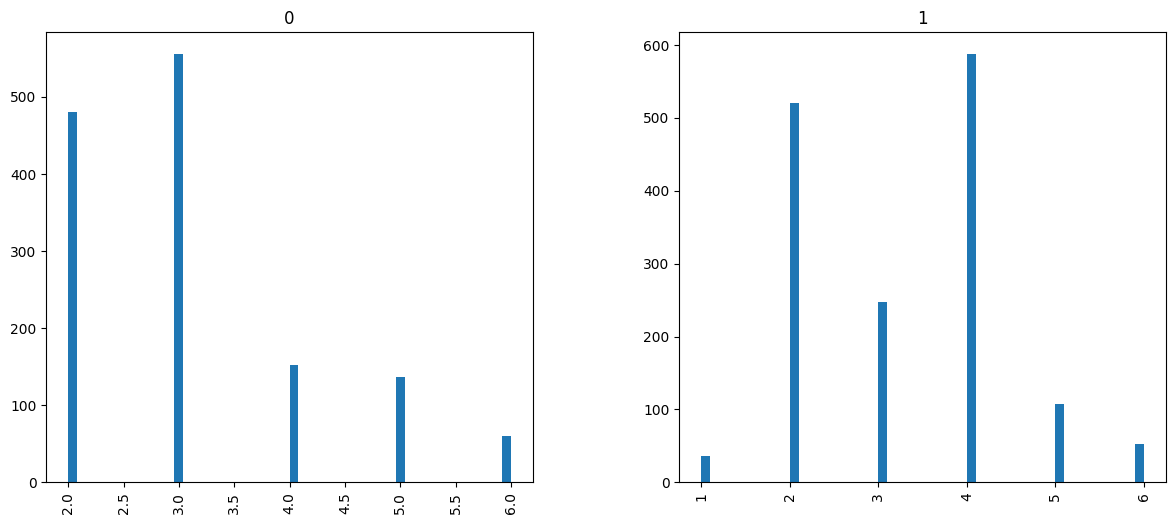

In [41]:
# Plot word count
df.hist(column='word_count', by='Sentiment', bins=50,figsize=(14,6))

# Calculate the average word count per review
average_word_count = df['word_count'].mean()
print(f"Average word count per review: {average_word_count:.2f}")

### Visualize word cloud for negative reviews

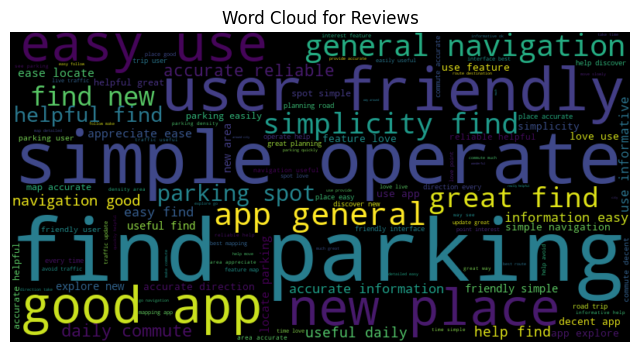

In [42]:
from wordcloud import WordCloud

# Visualize the common words using a word cloud
high_word_count_reviews = df[df['Sentiment']==1]  # Adjust the threshold as needed
wordcloud_text = ' '.join(high_word_count_reviews['clean_text'])
wordcloud_text = re.sub(r'[^a-zA-Z0-9\s]','',wordcloud_text)
wordcloud_text = re.sub(r'\b\w\b','',wordcloud_text)
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(str(wordcloud_text))
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud for Reviews')
plt.show()

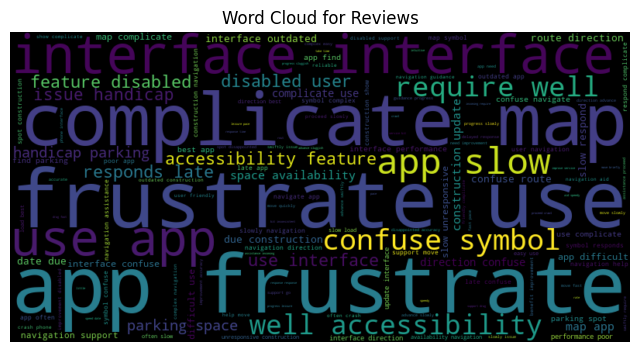

In [43]:
from wordcloud import WordCloud

# Visualize the common words using a word cloud
high_word_count_reviews = df[df['Sentiment']==0]  # Adjust the threshold as needed
wordcloud_text = ' '.join(high_word_count_reviews['clean_text'])
wordcloud_text = re.sub(r'[^a-zA-Z0-9\s]','',wordcloud_text)
wordcloud_text = re.sub(r'\b\w\b','',wordcloud_text)
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(str(wordcloud_text))
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud for Reviews')
plt.show()

# Split TRAIN and TEST Set

# 

In [44]:
model_data = df.drop(['Review'], axis=1)
model_data.head()

,Sentiment,clean_text,clean_text_token,word_count
0,1,easy use informative,"[easy, use, informative]",3
1,0,issue handicap parking space availability,"[issue, handicap, parking, space, availability]",5
2,0,map symbol complex,"[map, symbol, complex]",3
3,1,like simplicity find parking,"[like, simplicity, find, parking]",4
4,0,easy use,"[easy, use]",2


In [45]:
from sklearn.model_selection import train_test_split
test_size = 0.3
random_state = 42

model_train, model_test = train_test_split(model_data, test_size=test_size, random_state=random_state)
print(model_train.shape, model_test.shape)

(2055, 4) (881, 4)


# Word Embedding using TF-IDF

In [46]:
# Dependent Variable
y_train = model_train['Sentiment']
y_test = model_test['Sentiment']

### Vectorize text using TfidfVectorizer
Equivalent to CountVectorizer followed by TfidfTransformer.
<!-- https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html -->
<!-- https://towardsdatascience.com/what-and-why-behind-fit-transform-vs-transform-in-scikit-learn-78f915cf96fe -->
<!-- https://www.kdnuggets.com/2022/09/convert-text-documents-tfidf-matrix-tfidfvectorizer.html -->
<!-- https://hackernoon.com/document-term-matrix-in-nlp-count-and-tf-idf-scores-explained -->
<!-- https://stackoverflow.com/questions/32591629/scikit-learn-calculating-tf-idf-from-a-corpus-of-arrays-of-features-instead-of -->

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize text using TfidfVectorizer
# tfidf = TfidfVectorizer(min_df=.01) #(ngram_range=(1,2),min_df=2, max_features = 10000, min_df=.01)
tfidf = TfidfVectorizer(ngram_range=(1,1), max_features = 500)

In [48]:
# Convert a collection of raw documents to a matrix of TF-IDF term features. fit_transform() on TRAIN data
x_train_tfidf_matrix = tfidf.fit_transform(model_train["clean_text"])

# transform() on TEST data 
# Using the transform method we can use the same mean and variance as it is calculated from our training data to transform our test data. Thus, the parameters learned by our model using the training data will help us to transform our test data.
x_test_tfidf_matrix = tfidf.transform(model_test["clean_text"])

In [49]:
# Extract feature_names
terms_features = tfidf.get_feature_names_out()
print(len(terms_features))
print(terms_features[0:500])

139
['accessibility' 'accuracy' 'accurate' 'advance' 'aid' 'app' 'appreciate'
 'area' 'around' 'assistance' 'availability' 'avoid' 'benefit' 'best'
 'bit' 'briefly' 'city' 'commute' 'complex' 'complicate' 'confuse'
 'construction' 'could' 'crash' 'crawl' 'daily' 'date' 'decent' 'delayed'
 'density' 'destination' 'detailed' 'difficult' 'direction' 'disabled'
 'disappointed' 'discover' 'drag' 'due' 'ease' 'easily' 'easy' 'every'
 'explore' 'fast' 'feature' 'find' 'follow' 'foot' 'friendly' 'frustrate'
 'general' 'go' 'good' 'great' 'guidance' 'handicap' 'help' 'helpful'
 'improve' 'improvement' 'incoming' 'inconsistent' 'information'
 'informative' 'interest' 'interface' 'intuitive' 'issue' 'late' 'leisure'
 'like' 'little' 'live' 'load' 'locate' 'love' 'make' 'map' 'mapping'
 'move' 'much' 'navigate' 'navigation' 'need' 'new' 'often' 'ok' 'operate'
 'outdated' 'pace' 'parking' 'performance' 'phone' 'place' 'planning'
 'point' 'poor' 'proceed' 'progress' 'provide' 'quickly' 'rate' 'reall

In [50]:
x_train_tfidf_vector = x_train_tfidf_matrix.toarray()
x_test_tfidf_vector = x_test_tfidf_matrix.toarray()

# View tfidf matrix as a dataframe
result = pd.DataFrame(data=x_train_tfidf_matrix.toarray(), columns=terms_features)
result.head(5)

,accessibility,accuracy,accurate,advance,aid,app,appreciate,area,around,assistance,...,traffic,trip,unresponsive,update,use,useful,user,way,well,wonderful
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.60194,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.404905,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.679021,0.0,0.0,0.0


In [51]:
from sklearn.decomposition import PCA
import plotly.express as px

# Use PCA for dimensionality reduction
pca = PCA(n_components=3, random_state=1234)
pca_tfidf = pca.fit_transform(x_train_tfidf_vector)

# Plot class separabality
colors = {0:'negative', 1:'positive'}
fig = px.scatter(x=pca_tfidf[:, 0], y=pca_tfidf[:, 1], color=y_train.map(colors))
fig.show()

## Data Modeling

In [52]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,f1_score

# Model Training
model = MultinomialNB()
model.fit(x_train_tfidf_vector, y_train)

# Predict the values of y
y_pred_train_nb = model.predict(x_train_tfidf_vector)
y_pred_test_nb = model.predict(x_test_tfidf_vector)

In [53]:
x_train_tfidf_vector.shape, x_test_tfidf_vector.shape

((2055, 139), (881, 139))

In [54]:
# Get Pred
y_test_pred = model.predict(x_test_tfidf_vector)
# y_test_pred

# Performance Evaluation

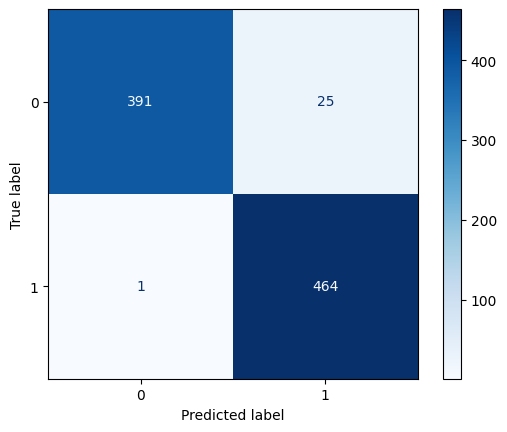

In [55]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,list(y_test_pred), values_format=".0f", cmap=plt.cm.Blues)

In [56]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,f1_score
 
print("Accuracy for LR model:",accuracy_score(y_test,list(y_test_pred)))
print("\t\tClassification Report:\n\n",classification_report(y_test,list(y_test_pred)))

Accuracy for LR model: 0.9704880817253121
		Classification Report:

               precision    recall  f1-score   support

           0       1.00      0.94      0.97       416
           1       0.95      1.00      0.97       465

    accuracy                           0.97       881
   macro avg       0.97      0.97      0.97       881
weighted avg       0.97      0.97      0.97       881



In [57]:
# Cross-Validation

from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold

scores = cross_val_score(model, x_train_tfidf_vector, y_train, cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1234), scoring='accuracy')

print('Mean Accuracy : {:.2f}'.format(scores.mean()))
scores

Mean Accuracy : 0.97


array([0.97572816, 0.96116505, 0.97087379, 0.97087379, 0.95145631,
       0.9804878 , 0.94146341, 0.9902439 , 0.93658537, 0.9902439 ])

In [58]:
import lime
import lime.lime_tabular
from lime import lime_text
from lime.lime_text import LimeTextExplainer

In [59]:
df.shape, preprocessed_df.shape

((2936, 5), (2936, 14))

In [60]:
df.head()

,Review,Sentiment,clean_text,clean_text_token,word_count
0,Easy to use and very informative,1,easy use informative,"[easy, use, informative]",3
1,Issues with handicap parking space availability,0,issue handicap parking space availability,"[issue, handicap, parking, space, availability]",5
2,Map symbols complex,0,map symbol complex,"[map, symbol, complex]",3
3,I like it's simplicity in finding parking,1,like simplicity find parking,"[like, simplicity, find, parking]",4
4,It is easy to use,0,easy use,"[easy, use]",2


In [61]:
preprocessed_df.head()

,Customer ID,Name,Location,Gender,Age,Access Frequency,Preferred Map Type,Person with Disability,Rating,Review,Clusters,Sentiment,Sentiment2,Sentiment3
0,1,Alice,Toronto,M,25,daily,default-2d,no,5,Easy to use and very informative,2,1,Positive,POSITIVE
1,2,Bob,Toronto,M,32,daily,default-2d,yes,2,Issues with handicap parking space availability,3,0,Negative,NEGATIVE
2,3,Charlie,Montreal,F,61,monthly,default-2d,no,2,Map symbols complex,1,0,Negative,NEGATIVE
3,4,David,Winnipeg,F,42,weekly,default-2d,yes,5,I like it's simplicity in finding parking,2,1,Positive,POSITIVE
4,5,Emma,Vancouver,M,61,weekly,default-2d,no,2,It is easy to use,3,0,Negative,NEGATIVE


In [62]:
preprocessed_df['clean_text'] = df['clean_text']

In [63]:
preprocessed_df.drop(['Sentiment2', 'Sentiment3'], axis=1, inplace=True)
preprocessed_df.head()

,Customer ID,Name,Location,Gender,Age,Access Frequency,Preferred Map Type,Person with Disability,Rating,Review,Clusters,Sentiment,clean_text
0,1,Alice,Toronto,M,25,daily,default-2d,no,5,Easy to use and very informative,2,1,easy use informative
1,2,Bob,Toronto,M,32,daily,default-2d,yes,2,Issues with handicap parking space availability,3,0,issue handicap parking space availability
2,3,Charlie,Montreal,F,61,monthly,default-2d,no,2,Map symbols complex,1,0,map symbol complex
3,4,David,Winnipeg,F,42,weekly,default-2d,yes,5,I like it's simplicity in finding parking,2,1,like simplicity find parking
4,5,Emma,Vancouver,M,61,weekly,default-2d,no,2,It is easy to use,3,0,easy use


# Save Processed Data

In [64]:

preprocessed_df.to_csv('v5_preprocessed.csv', index=False)